# Étude des données WINE

Dans ce notebook, vous trouverez les prévisions réalisées pour les données sur le vin. 

Voici les étapes de la procédure : 
- importer les librairies
- importer les données 
- nettoyage des données
    - traitement des doublons 
    - vérification de la présence de valeurs manquantes ou non 
    - vérification de l'influence des valeurs aberrantes
- analyse descriptive
    - étude des corrélations 
    - étude de la répartition des vins
- Division des données en deux échantillons + normalisation 
- Modélisation avec les classifiers 
- Prévisions

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

# librairie pour le preprocessing
from sklearn.preprocessing import StandardScaler

# librairie pour la modélisation
from sklearn.datasets import load_wine # Iris data
from sklearn.model_selection import train_test_split # split into two sample : training and test
from sklearn.model_selection import cross_val_score # split into two sample : validation and training
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # RandomForest Classifier
from sklearn.svm import SVC, LinearSVC # SVC
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # GaussianNB
from sklearn.linear_model import Perceptron # Perceptron
from sklearn.linear_model import SGDClassifier # SGD
from sklearn.tree import DecisionTreeClassifier # Tree Decision

# librairie pour évaluer
from sklearn.metrics import accuracy_score
import optuna

# librairie pour les visualisations
import matplotlib.pyplot as plt  

# librairie pour faire de l'industrialisation
import joblib

In [79]:
# Charger les données iris 
wine = load_wine()
# Créer un DataFrame pandas à partir des données et des noms des colonnes
data_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names) # features
data_wine["target"] = wine.target
# Afficher les 10 premières lignes des données iris
data_wine.head(20)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32               16.8       95.0           2.20   
12    13.75        1.73  2.41               16.0       89.0           2.60   
13    14.75        1.73  2.39               11.4       91.0           3.10   
14    14.38        1.87  2.38               12.0      102.0           3.30   
15    13.63        1.81  2.70               17.2      112.0           2.85   
16    14.30        1.92  2.72               20.0      120.0           2.80   
17    13.83        1.57  2.62               20.0      115.0           2.95   
18    14.19        1.59  2.48               16.5      108.0           3.30   
19    13.64        3.10  2.56               15.2      116.0           2.70   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
5         3.39                  0.34             1.97             6.75  1.05   
6         2.52                  0.30             1.98             5.25  1.02   
7         2.51                  0.31             1.25             5.05  1.06   
8         2.98                  0.29             1.98             5.20  1.08   
9         3.15                  0.22             1.85             7.22  1.01   
10        3.32                  0.22             2.38             5.75  1.25   
11        2.43                  0.26             1.57             5.00  1.17   
12        2.76                  0.29             1.81             5.60  1.15   
13        3.69                  0.43             2.81             5.40  1.25   
14        3.64                  0.29             2.96             7.50  1.20   
15        2.91                  0.30             1.46             7.30  1.28   
16        3.14                  0.33             1.97             6.20  1.07   
17        3.40                  0.40             1.72             6.60  1.13   
18        3.93                  0.32             1.86             8.70  1.23   
19        3.03                  0.17             1.66             5.10  0.96   

    od280/od315_of_diluted_wines  proline  target  
0                           3.92   1065.0       0  
1                           3.40   1050.0       0  
2                           3.17   1185.0       0  
3                           3.45   1480.0       0  
4                           2.93    735.0       0  
5                           2.85   1450.0       0  
6                           3.58   1290.0       0  
7                           3.58   1295.0       0  
8                           2.85   1045.0       0  
9                           3.55   1045.0       0  
10                          3.17   1510.0       0  
11                          2.82   1280.0       0  
12      

In [80]:
print(data_wine.count())
print(data_wine.shape)

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
target                          178
dtype: int64
(178, 14)


In [81]:
# vérification des types de chaque variable du dataframe wine
data_wine.dtypes
# conversion de la variable cible quantitative en variable catégorielle
data_wine['target'] = data_wine['target'].astype('category')

## Nettoyage des données

Vérifions la présence des doublons, des valeurs manquantes et des valeurs aberrantes. 

#### Doublons

In [82]:
# Duplicated 

## Recherche des éventuelles duplicated
duplicates = data_wine[data_wine.duplicated()]
print("Doublons :")
print(duplicates)

Doublons :
Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target]
Index: []


#### Valeurs manquantes

In [83]:
# Recherche d'éventuel valeurs manquantes selon les colonnes
missing_values = data_wine.isnull().sum()
print("Valeurs manquantes :")
print(missing_values)

Valeurs manquantes :
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


On observe aucune valeurs manquantes selon les colonnes pour ce dataframe. 

#### Valeurs aberrantes

In [84]:
# Recherche des valeurs aberrantes
Q1 = data_wine.drop(['target'], axis=1).quantile(0.25)
Q3 = data_wine.drop(['target'], axis=1).quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_wine.drop(['target'], axis=1) < (Q1 - 1.5 * IQR)) | (data_wine.drop(['target'], axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)
print("Valeurs aberrantes :")
data_wine.drop(['target'], axis=1)[outliers]

Valeurs aberrantes :


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
25     13.05        2.05  3.22               25.0      124.0           2.63   
59     12.37        0.94  1.36               10.6       88.0           1.98   
69     12.21        1.19  1.75               16.8      151.0           1.85   
73     12.99        1.67  2.60               30.0      139.0           3.30   
78     12.33        0.99  1.95               14.8      136.0           1.90   
95     12.47        1.52  2.20               19.0      162.0           2.50   
110    11.46        3.74  1.82               19.5      107.0           3.18   
115    11.03        1.51  2.20               21.5       85.0           2.46   
121    11.56        2.05  3.23               28.5      119.0           3.18   
123    13.05        5.80  2.13               21.5       86.0           2.62   
127    11.79        2.13  2.78               28.5       92.0           2.13   
137    12.53        5.51  2.64               25.0       96.0           1.79   
151    12.79        2.67  2.48               22.0      112.0           1.48   
158    14.34        1.68  2.70               25.0       98.0           2.80   
159    13.48        1.67  2.64               22.5       89.0           2.60   
166    13.45        3.70  2.60               23.0      111.0           1.70   
173    13.71        5.65  2.45               20.5       95.0           1.68   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
25         2.68                  0.47             1.92             3.58  1.13   
59         0.57                  0.28             0.42             1.95  1.05   
69         1.28                  0.14             2.50             2.85  1.28   
73         2.89                  0.21             1.96             3.35  1.31   
78         1.85                  0.35             2.76             3.40  1.06   
95         2.27                  0.32             3.28             2.60  1.16   
110        2.58                  0.24             3.58             2.90  0.75   
115        2.17                  0.52             2.01             1.90  1.71   
121        5.08                  0.47             1.87             6.00  0.93   
123        2.65                  0.30             2.01             2.60  0.73   
127        2.24                  0.58             1.76             3.00  0.97   
137        0.60                  0.63             1.10             5.00  0.82   
151        1.36                  0.24             1.26            10.80  0.48   
158        1.31                  0.53             2.70            13.00  0.57   
159        1.10                  0.52             2.29            11.75  0.57   
166        0.92                  0.43             1.46            10.68  0.85   
173        0.61                  0.52             1.06             7.70  0.64   

     od280/od315_of_diluted_wines  proline  
25                           3.20    830.0  
59                           1.82    520.0  
69                           3.07    718.0  
73                           3.50    985.0  
78                           2.31    750.0  
95                           2.63    937.0  
110                          2.81    562.0  
115                          2.87    407.0  
121                          3.69    465.0  
123                          3.10    380.0  
127                          2.44    466.0  
137                          1.69    515.0  
151                          1.47    480.0  
158                          1.96    660.0  
159                          1.78    620.0  
166                          1.56    695.0  
173                          1.74    740.0

In [85]:
data_wine.drop(['target'], axis=1)[outliers].shape

(17, 13)

In [86]:
# Concaténer les deux DataFrames
df_bound = pd.concat([Q1 - 1.5 * IQR, Q1 + 1.5 * IQR], axis=1)
df_bound.rename(columns={'lower': '0', 'upper': '1'}, inplace=True)
df_bound

0           1
alcohol                        10.39000    14.33500
malic_acid                     -0.61750     3.82250
ash                             1.68875     2.73125
alcalinity_of_ash              10.75000    23.65000
magnesium                      59.50000   116.50000
total_phenols                   0.15625     3.32875
flavanoids                     -1.30000     3.71000
nonflavanoid_phenols            0.01875     0.52125
proanthocyanins                 0.20000     2.30000
color_intensity                -1.25000     7.69000
hue                             0.27625     1.28875
od280/od315_of_diluted_wines    0.08875     3.78625
proline                      -226.25000  1227.25000

In [87]:
# Ajout des features
df_bound = df_bound.reset_index(inplace=False)
df_bound.rename(columns={'index': 'feature'}, inplace=True)

À l'oeil, on constate que, la variable *alcohol* ne possède pas de valeurs aberrantes. 

On peut essayer de regarder les diagrammes de distribution pour chaque variable pour constater l'importance des valeurs aberrantes.

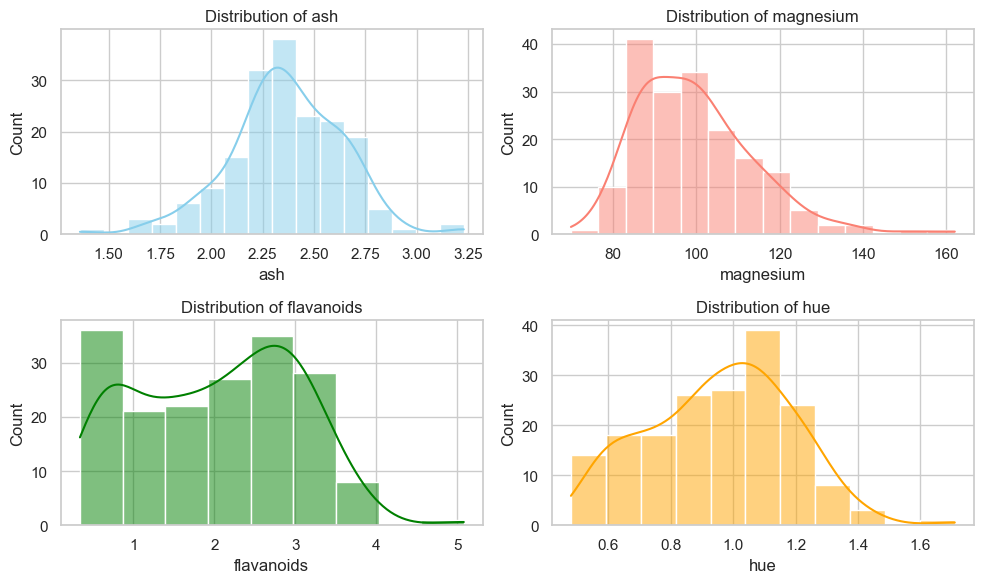

In [88]:
# Vérifier si ces valeurs aberrantes sont intéressantes dans le cadre de notre étude
# Définir le style de seaborn
sns.set(style="whitegrid")

# Tracer les diagrammes de distribution pour chaque variable
plt.figure(figsize=(10, 6))

# Ash
plt.subplot(2, 2, 1)
sns.histplot(data=data_wine, x='ash', kde=True, color='skyblue')
plt.title('Distribution of ash')

# Magnesium
plt.subplot(2, 2, 2)
sns.histplot(data=data_wine, x='magnesium', kde=True, color='salmon')
plt.title('Distribution of magnesium')

# Petal Length
plt.subplot(2, 2, 3)
sns.histplot(data=data_wine, x='flavanoids', kde=True, color='green')
plt.title('Distribution of flavanoids')

# Petal Width
plt.subplot(2, 2, 4)
sns.histplot(data=data_wine, x='hue', kde=True, color='orange')
plt.title('Distribution of hue')

plt.tight_layout()
plt.show()

On constate la présence de valeurs aberrantes inutiles pour 4 variables : *flavanoids*, *hue*, *ash* et *magnesium*. 

In [89]:
# Identifier les lignes contenant des valeurs aberrantes pour au moins une des quatre variables
features_outliers = ['flavanoids', 'hue', 'ash', 'magnesium']
masque_aberrant = pd.Series(False, index=data_wine.index)
for var in features_outliers:
    outliers = (data_wine[var] < df_bound.loc[df_bound['feature'] == var, 0].values[0]) | (data_wine[var] > df_bound.loc[df_bound['feature'] == var, 1].values[0])

# Supprimer les lignes contenant des valeurs aberrantes
data_wine = data_wine[~outliers]

## Description des données 
- étude descriptives (moyenne, mediane, 1er quartile, 3èlme quartile)
- étude des corrélations entre les différentes variables quantitatives (nuage de points)

In [90]:
# Calcule de la moyenne de chaque colonne
data_wine.drop(["target"], axis=1).mean(numeric_only = True)

alcohol                          12.964968
malic_acid                        2.371592
ash                               2.350318
alcalinity_of_ash                19.494904
magnesium                        96.044586
total_phenols                     2.270828
flavanoids                        1.977325
nonflavanoid_phenols              0.368535
proanthocyanins                   1.550828
color_intensity                   5.020000
hue                               0.954242
od280/od315_of_diluted_wines      2.581146
proline                         731.573248
dtype: float64

In [91]:
# description statistiques (médiane, 1er et 3ème quartile)
data_wine.drop(["target"], axis=1).quantile(q = [0.25,0.5,0.75], numeric_only = True)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0.25    12.34        1.60  2.20               17.4       88.0           1.74   
0.50    12.96        1.87  2.36               19.5       96.0           2.23   
0.75    13.63        3.17  2.53               21.5      103.0           2.74   

      flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
0.25        1.09                  0.27             1.15             3.08   
0.50        2.04                  0.34             1.48             4.60   
0.75        2.78                  0.45             1.87             6.25   

       hue  od280/od315_of_diluted_wines  proline  
0.25  0.78                          1.92    495.0  
0.50  0.96                          2.77    640.0  
0.75  1.12                          3.14    985.0

In [92]:
# valeur possible pour la variable target
data_wine['target'].unique()
print(f"Les valeurs possible prises par la variable 'target' sont : {[k for k in data_wine['target'].unique()]}")

Les valeurs possible prises par la variable 'target' sont : [0, 1, 2]


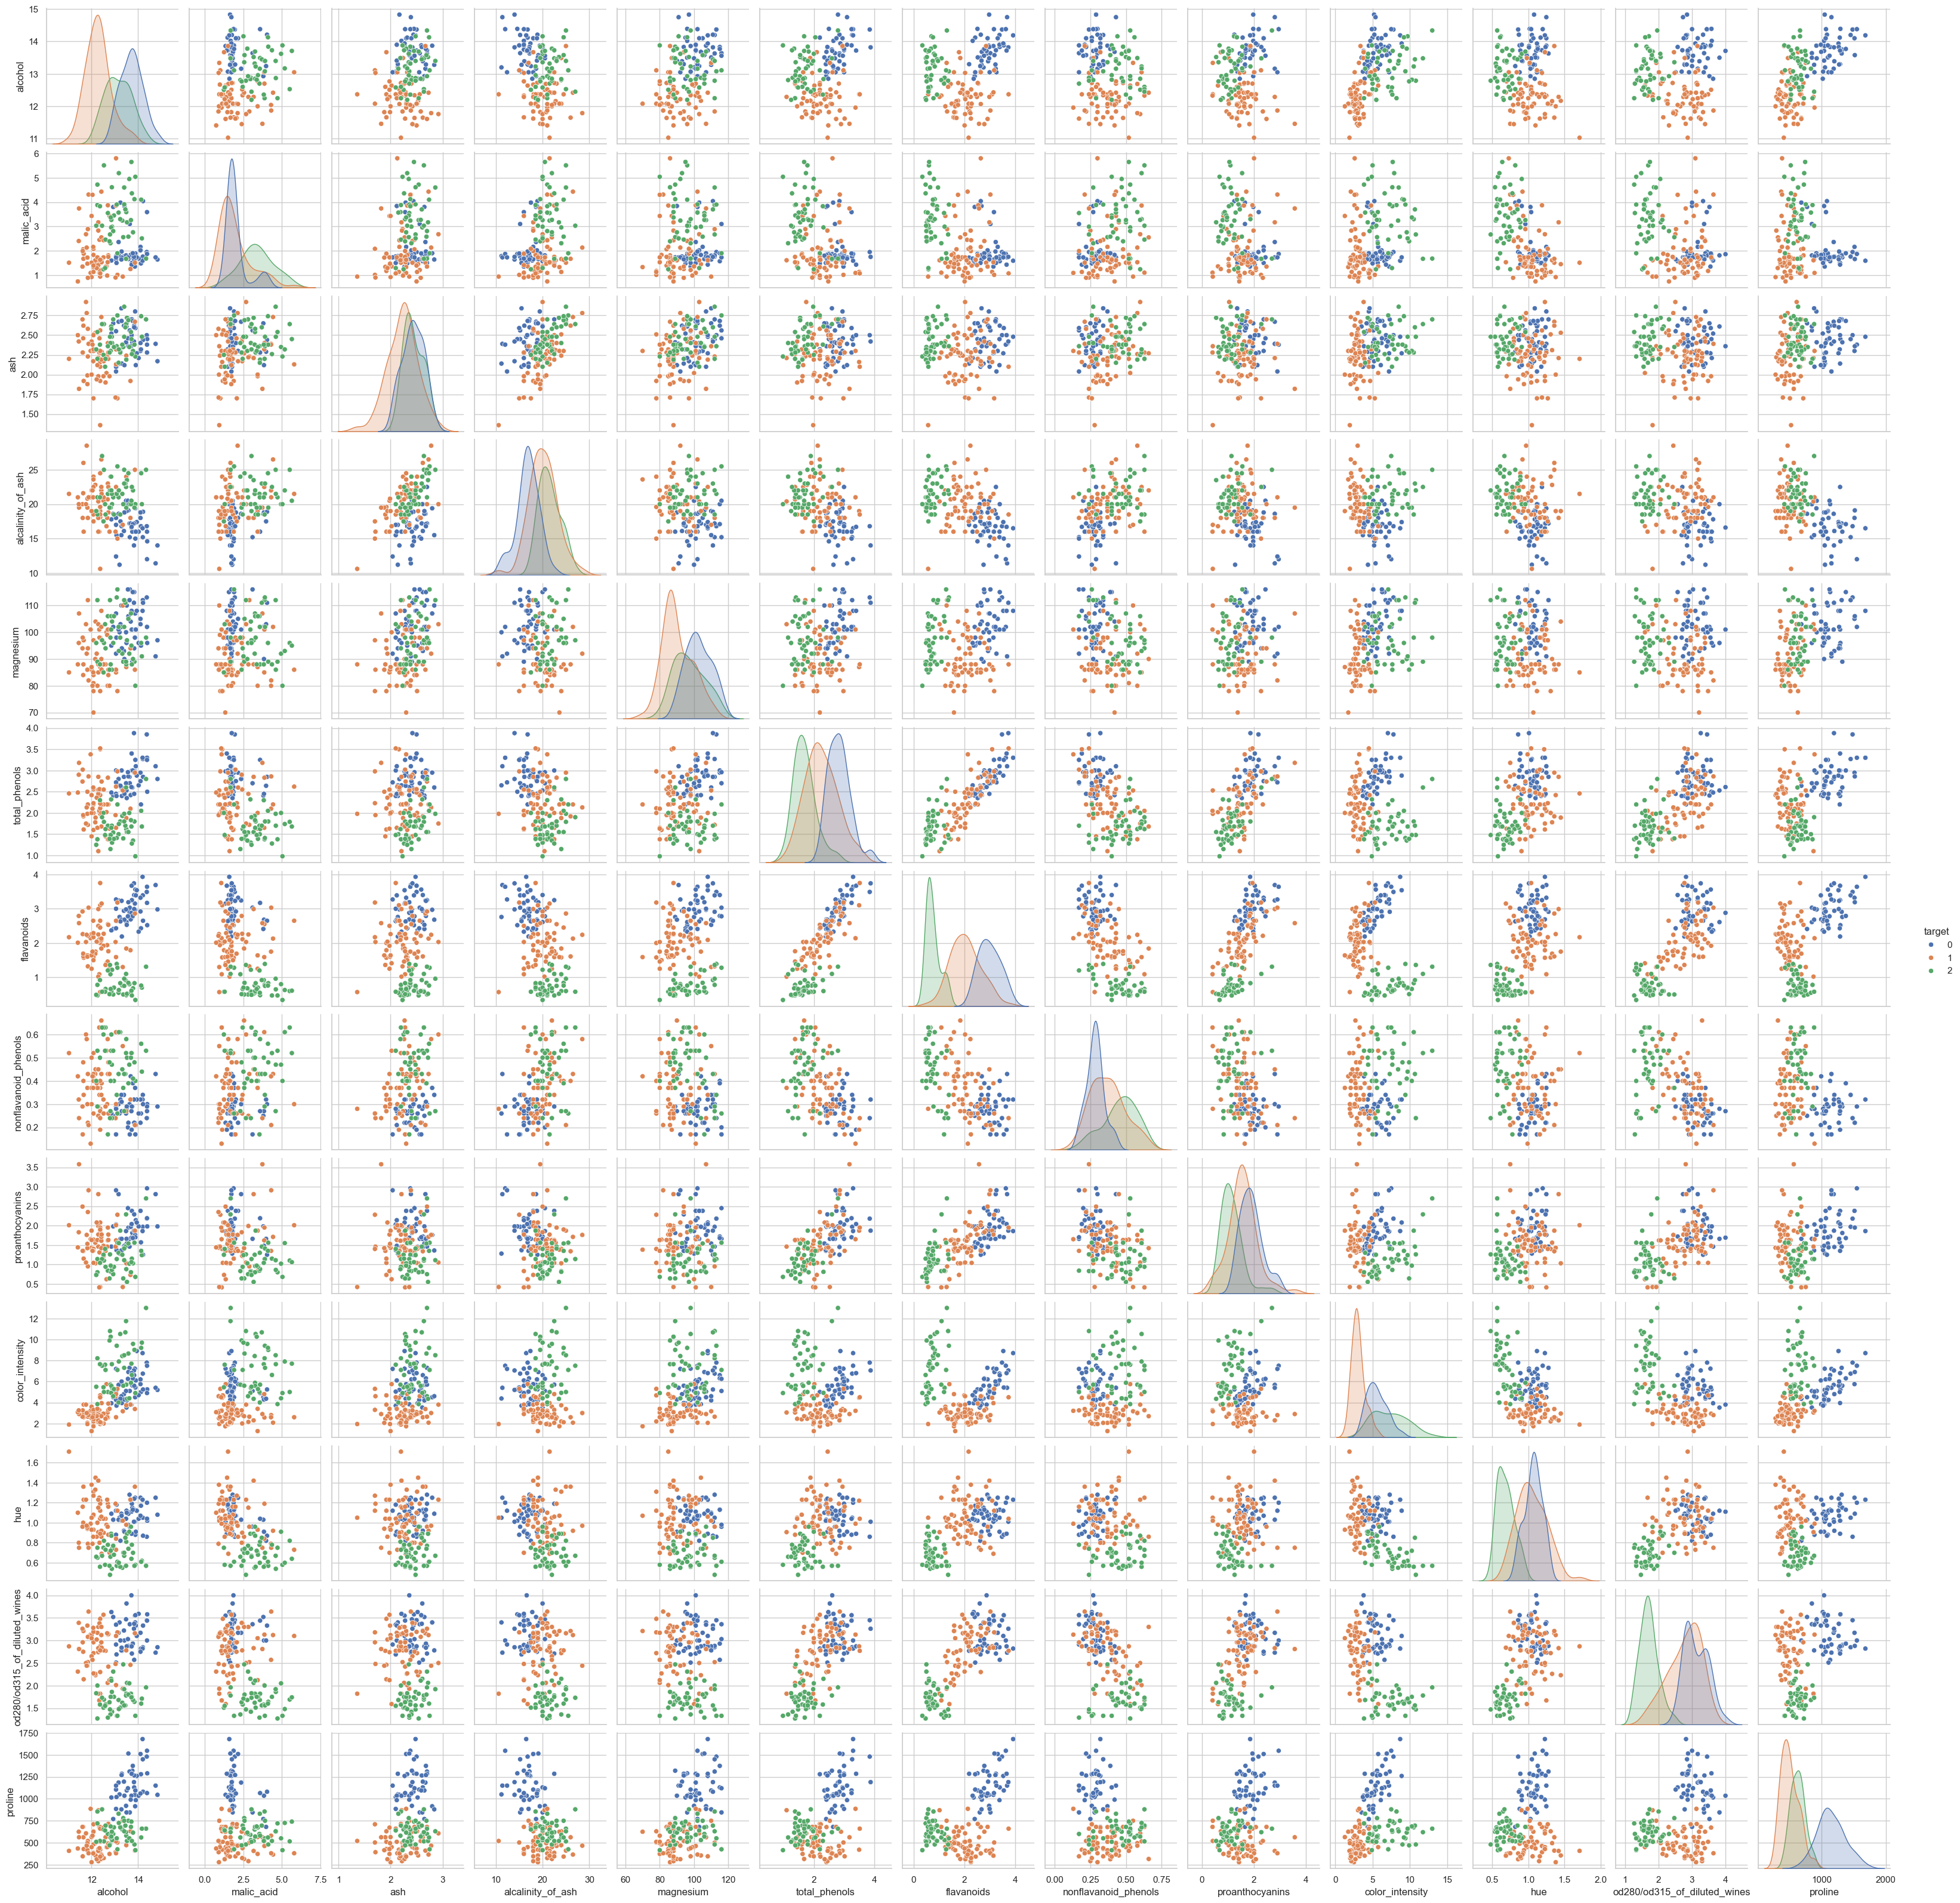

In [93]:
# Étude des relations entres les différentes variables 
sns.pairplot(data_wine, hue='target')

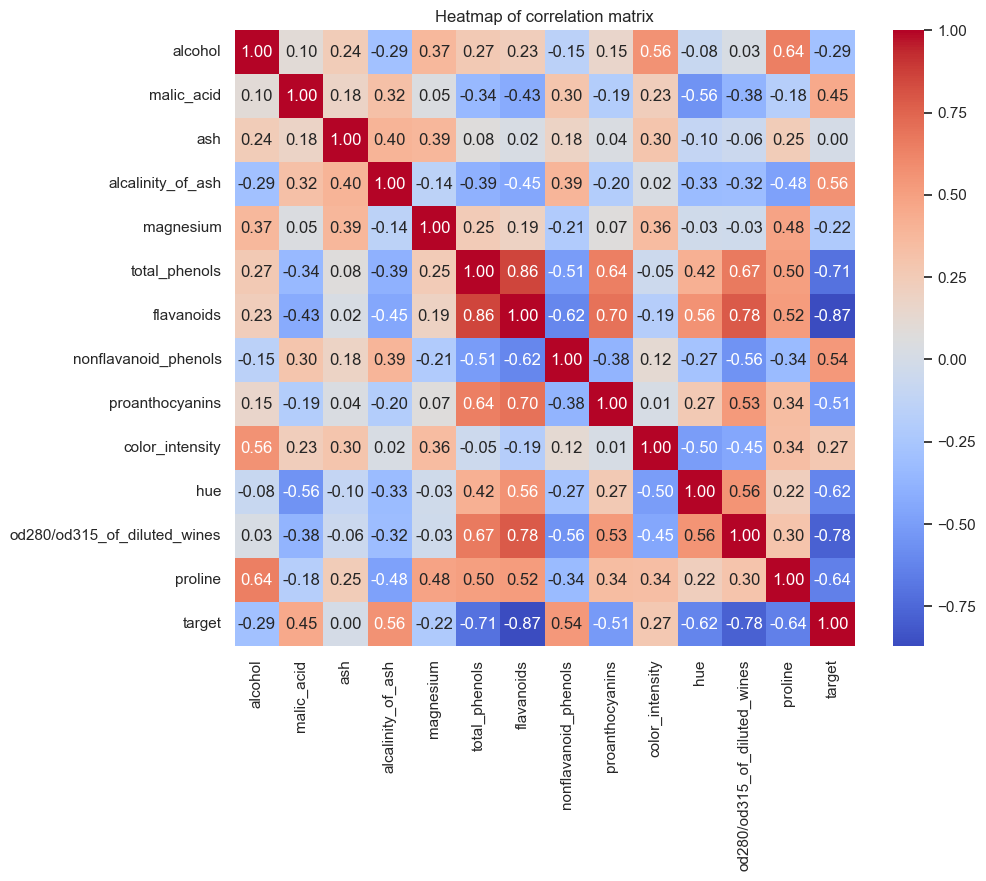

In [94]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_wine.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of correlation matrix')
plt.show()

On constate qu'il existe de forte corrélations entre différentes variables :

- concernant la variable **target** :
    - forte corrélation négative avec les variables *flavanoids*, *diluted_wines*, *hue*, *total_phenols*, *proline*;
    - forte corrélation positive avec la variable *alcalinity_of_ash* et *nonflavanoid_phenols*;

- entre les **features** :
    - forte corrélation positive entre *proline* et *alcohol*;
    - forte corrélation positive entre *color_intensity* et *alcohol*;
    - forte corrélation négative entre *hue* et *malic_acid*;
    - forte corrélation positive entre *flavanoids* et *total_phenols*;
    - forte corrélation positive entre *proanthocyanins* et *total_phenols*;
    - forte corrélation positive entre *diluted_wines* et *total_phenols*;
    - forte corrélation positive entre *proline* et *total_phenols*;
    - forte corrélation positive entre *hue* et *flavanoids*;
    - forte corrélation positive entre *diluted_wines* et *flavanoids*;
    - forte corrélation positive entre *proanthocyanins* et *flavanoids*;
    - forte corrélation négative entre *nonflavanoids_phenols* et *flavanoids*;
    - forte corrélation positive entre *hue* et *diluted_wines*;

Il existe alors une vraie présence de la multicolinéarité avec les variables *flavanoids* et *total_phenols* qui sont fortement corrélées à d'autres features et à la variable cible. 

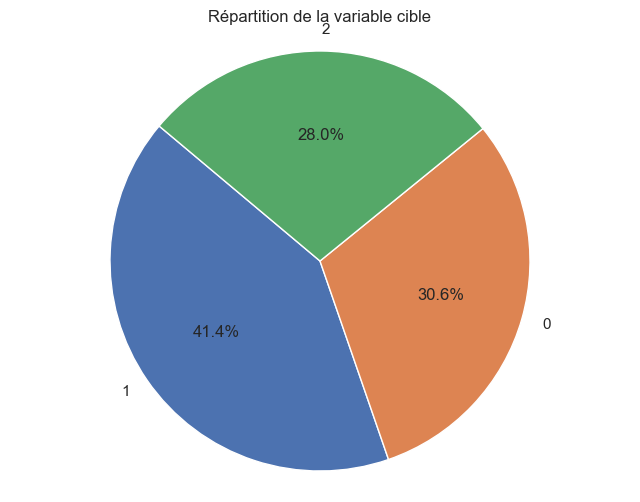

In [95]:
# Répartition des alcools

## Compter les occurrences de chaque classe dans la variable cible
target_counts = data_wine['target'].value_counts()

## Extraire les étiquettes et les valeurs à partir du comptage
labels = target_counts.index
sizes = target_counts.values

## Créer le diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition de la variable cible')
plt.axis('equal')  # Assure que le diagramme est circulaire
plt.show()

Au niveau de la répartition, les types d'alcools ne sont pas équitables. En effet, on observe que, le type 1 est plus présent que les autres. 

## Diviser en deux échantillons

In [96]:
# Split into two sample
X = data_wine.drop(['target'], axis=1) # feature
y = data_wine['target'] # target

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)